In [ ]:
"""
Purpose: To set up the tables that will 
be used for validation and to test the 
overall progress

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [3]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-26 04:10:39,053 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-26 04:10:39,055 - settings - Setting database.user to celiib
INFO - 2021-02-26 04:10:39,056 - settings - Setting database.password to newceliipass
INFO - 2021-02-26 04:10:39,060 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-02-26 04:10:39,061 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 04:10:39,074 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-02-26 04:10:39,405 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 04:10:39,438 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 04:10:39,808 - settings - Setting enable_python_native_blobs to True


In [4]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd

INFO - 2021-02-26 04:10:39,964 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 04:10:40,378 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu

# Inspecting the Proofread Cells for the Vallidation Set

In [ ]:
minnie.AutoProofreadValidationNeurons3()

In [ ]:
segment_id = 864691136618412685

In [ ]:
du.plot_proofread_neuron(segment_id=segment_id,
                       split_index=0,


                      #for plotting the error faces
                       plot_errored_faces=True,
                       errored_faces_color=[1,0,0,0.2],

                      #for plotting the synapse
                      plot_synapses=True,
                      synapse_scatter_size=0.3,
                      valid_presyn_color="yellow",
                      valid_postsyn_color="aqua",
                      error_presyn_color="black",
                      error_postsyn_color="orange",


                      plot_nuclei=True,
                      nuclei_color = "brown",
                      nuclei_size = 1,#2500,
                      nuclei_plot_type="scatter",#other option is mesh

                      plot_paired_nuceli=True,
                      paired_nuclei_color = "lime",

                      plot_axon=True,
                      validation = True,
                         
                         plot_error_synapses=True,

              verbose=False,
                      )

# Calculating the Statistics For the Neuron Proofreading

In [6]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False) for k in segment_ids]

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 73
n_errored_syn_ids_presyn = 448
n_valid_syn_ids_postsyn = 3899
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 87
n_errored_syn_ids_presyn = 620
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 72
n_errored_syn_ids_presyn = 219
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 2383
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 47
n_valid_syn_ids_postsyn = 2334
n_errored_syn_ids_postsyn = 2
Synapsse Results:
Total Number of Synapses = 4015
n_valid_syn_ids_presyn = 12
n_errored_syn_ids_presyn = 109
n_valid_syn_ids_postsyn = 3879
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 3
n_errored_syn_ids_presyn = 212
n_valid_syn_ids_postsyn = 1528
n_errored_syn_ids_postsyn = 171
Synapsse Results:
Total Number of Synapses = 10012
n_valid_syn_ids_presyn = 8
n_errored_syn_ids_presyn = 164
n_valid_syn_ids_postsyn = 9825
n_errored_

In [ ]:
score_dfs = [vu.synapse_validation_df_to_score_df(v_df)
             for v_df in validation_dfs]

In [ ]:
vu.score_scatterplot(df = score_dfs)

# Computing the FP,FN information

In [ ]:
new_dict = pd.concat(score_dfs)[["Type","recall","precision","f1"]]
collapsed_df = new_dict.groupby("Type").mean()

vu.plot_scores(#need to order by 
    score_df = collapsed_df,
    synapse_types = ["presyn","postsyn","both"],
    score_types = ["precision","recall","f1"],
    y_label='Statistics (Mean)',
    title = "Autoproofreading Validation (Mean) \n Version 2")

collapsed_df = new_dict.groupby("Type").median()

vu.plot_scores(#need to order by 
    score_df = collapsed_df,
    synapse_types = ["presyn","postsyn","both"],
    score_types = ["precision","recall","f1"],
    y_label='Statistics (Median)',
    title = "Autoproofreading Validation (Median) \n Version 2")

# The complete numbers

In [7]:
validation_dfs_combined = pd.concat(validation_dfs)

score_combined = vu.synapse_validation_df_to_score_df(validation_dfs_combined)
total_score_df = score_combined[["Type","precision","recall","f1"]]
total_score_df = total_score_df.set_index("Type")
total_score_df
# score_dfs = [vu.synapse_validation_df_to_score_df(v_df)
#              for v_df in validation_dfs]
# score_dfs[0]

,precision,recall,f1
Type,,,
presyn,0.746180,0.677708,0.710298
postsyn,0.998468,0.991360,0.994901
both,0.996011,0.988023,0.992001


INFO - 2021-02-26 04:14:50,831 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 04:14:57,383 - settings - Setting enable_python_native_blobs to True


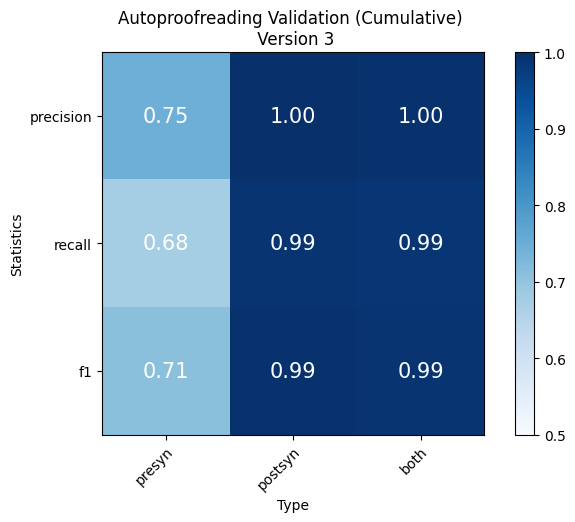

In [13]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


vu.plot_scores(#need to order by 
    score_df = total_score_df,
    synapse_types = ["presyn","postsyn","both"],
    score_types = ["precision","recall","f1"],
    y_label='Statistics',
    title = "Autoproofreading Validation (Cumulative) \n Version 3")

# Visuals

# -- Graph 1 -- 

In [ ]:
du.plot_proofread_neuron(segment_id,
                        validation=True)

In [ ]:
import matplotlib.pyplot as plt

"""
Purpose: To graph a score feature against a neuron morphology statistic

Pseudocode: 
1) Get the score statistic for ever neuron
2) Get the morphological feature for every neuron
3) Plot them against each other
4) Optionally plot the histogram of each as well
"""
synapse_type = "presyn"
score_statistic = "recall"
score_tables = score_dfs
morphology_statistic = "axon_length"
verbose = True
plot_individual_histograms = True
fig_width = 5
fig_height = 5

score_statistic_name = f"{synapse_type} {score_statistic}"
morphology_statistic_name = "Axon Skeletal Length (um)"

#1) Get the score statistic for ever neuron
score_per_neuron = []
morph_per_neuron = []
for j,k in enumerate(score_tables):
    
    #get the neuron name
    curr_segment_id =k["old_segment_id"][0]
    
    curr_score = k[(k["Type"] == synapse_type)][score_statistic].to_list()[0] 
    score_per_neuron.append(curr_score)
    
    

    #2) Get the morphological feature for every neuron
    curr_morph = du.segment_id_to_autoproofread_neuron_features(segment_id = curr_segment_id,
                                                   #split_index = 0,
                                                   statistic_names = [morphology_statistic],
                                                   validation = True,
                                        )
    morph_per_neuron.append(curr_morph)
    
    if False:
        print(f"Working on neuron {j}: {score_statistic} = {curr_score}, {morphology_statistic} = {curr_morph}")

#3) Plot them against each other
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

ax.scatter(morph_per_neuron,score_per_neuron)
ax.set_xlabel(morphology_statistic_name)
ax.set_ylabel(score_statistic_name)
ax.set_title(f"")
fig.show()

if plot_individual_histograms:
    individuals_names = [morphology_statistic_name,score_statistic_name]
    individuals_data = [morph_per_neuron,score_per_neuron]
    
    for n,d in zip(individuals_names,individuals_data):
        fig, ax = plt.subplots(figsize=(fig_width, fig_height))
        ax.hist(d,bins=20)
        ax.set_xlabel(n)
        ax.set_ylabel("Count")
        ax.set_title(f"{n} frequency")
        fig.show()


# Recall Drop Off With Euclidean Distance

In [ ]:
"""
Purpose: To get the recall of each neuron (and overall)
as a function of the euclidean distance from the soma center

Pseudocode: 
a) Get the validation dataframes for all neurons (that come along with the synapse coordinates)
b) Create a range of distance restrictions based on max and min distanes
c) Create a sampling array for distances
d) Iterate through the sampliing:
   i) restrict the table to synapses under that distance
   2) Compute the recall
   3) Save in array
"""

In [ ]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,) for k in segment_ids]


In [ ]:
# segment_id = 864691136008425132

# curr_mesh = du.fetch_segment_id_mesh(segment_id)
# soma_center = du.fetch_neuron_soma_center(segment_id)
# nviz.plot_objects(curr_mesh,
#                  scatters=[soma_center],
#                  scatter_size=4)


In [ ]:
cumulative_validation_df = pd.concat(validation_dfs)

In [ ]:
axon_length = 1000
curr_query = f"axon_length>{axon_length}"
curr_query_title = f"Axon Length > {axon_length} um"
seg_ids_in_query = (minnie.AutoProofreadValidationNeurons() & curr_query).fetch("segment_id")

current_validation_df = cumulative_validation_df[cumulative_validation_df["old_segment_id"].isin(seg_ids_in_query)]

vu.score_vs_euclidean_synapse_threshold_analysis(current_validation_df,
                                                title_append=f"Neurons with {curr_query_title} ({len(seg_ids_in_query)} Neurons)\n Version 3")

# Finding The Stats for Different Types of Neurons

In [ ]:
vu.score_vs_euclidean_synapse_threshold_analysis(cumulative_validation_df,
                                                title_append="Total")

# Development of the Recall Plots

In [ ]:
vu.synapse_distance_samples(cumulative_validation_df).shape

In [ ]:
score_dict,n_syn_dict = vu.compute_score_as_function_of_synapse_euclidean_distance(cumulative_validation_df)

In [ ]:
score_dict

In [ ]:
vu.plot_score_as_function_of_synapse_euclidean_distance(score_dict,
                                                     n_synapses_dict=n_syn_dict,
                                                         title_append="Total",
                                                        plot_synapse_histograms=True,
                                                       validation_df =cumulative_validation_df)

In [ ]:
synapse_dist = cumulative_validation_df["euclidean_distance_to_nuclei"].to_numpy()
_ = plt.hist(synapse_dist,bins=50)

In [ ]:
syn_distance_boundaries = [np.percentile(synapse_dist,5),np.percentile(synapse_dist,99)]
syn_distance_interval = 5000
syn_distance_samples = np.arange(*syn_distance_boundaries,syn_distance_interval)
syn_distance_samples.shape

In [ ]:
curr_score[curr_score["Type"] == s_type]["recall"].to_list()[0]

In [ ]:
recall_by_synapse_type

In [ ]:
# d) Iterate through the sampliing:
#    i) restrict the table to synapses under that distance
#    2) Compute the recall
#    3) Save in array

In [ ]:
curr_table[curr_table["synapse_type"] == "presyn"]

In [ ]:
from tqdm_utils import tqdm
validation_table = cumulative_validation_df


for synapse_type in synapse_types:

    title = f"{synapse_type.capitalize()} Recall vs Synapses Within Euclidean Threshold"
    synapse_distances = syn_distance_samples/1000

    recall_stats = recall_by_synapse_type[synapse_type]

    #3) Plot them against each other
    fig, axes = plt.subplots(1,2,figsize=(fig_width*2, fig_height))
    ax = axes[0]
    
    ax.plot(synapse_distances,recall_stats)
    ax.set_xlabel(f"Euclidean Threshold (um)")
    ax.set_ylabel(f"{synapse_type.capitalize()} Recall")
    ax.set_title(title)
    
    syn_totals = n_synapses_by_synapse_type[synapse_type]
    
    title = f"{synapse_type.capitalize()} Count vs Synapses Within Euclidean Threshold"
    ax = axes[1]
    ax.plot(synapse_distances,syn_totals)
    ax.set_xlabel(f"Euclidean Threshold (um)")
    ax.set_ylabel(f"Number of {synapse_type.capitalize()} Synapses")
    ax.set_title(title)
    
    fig.tight_layout()
    fig.show()

In [ ]:
"""
To plot the recall vs synaptic distance

"""

for synapse_type in synapse_types:

    title = f"{synapse_type.capitalize()} Recall vs Synapses Within Euclidean Threshold"
    synapse_distances = syn_distance_samples/1000

    recall_stats = recall_by_synapse_type[synapse_type]

    #3) Plot them against each other
    fig, axes = plt.subplots(1,2,figsize=(fig_width*2, fig_height))
    ax = axes[0]
    
    ax.plot(synapse_distances,recall_stats)
    ax.set_xlabel(f"Euclidean Threshold (um)")
    ax.set_ylabel(f"{synapse_type.capitalize()} Recall")
    ax.set_title(title)
    
    syn_totals = n_synapses_by_synapse_type[synapse_type]
    
    title = f"{synapse_type.capitalize()} Count vs Synapses Within Euclidean Threshold"
    ax = axes[1]
    ax.plot(synapse_distances,syn_totals)
    ax.set_xlabel(f"Euclidean Threshold (um)")
    ax.set_ylabel(f"Number of {synapse_type.capitalize()} Synapses")
    ax.set_title(title)
    
    fig.tight_layout()
    fig.show()
    

In [ ]:
minnie.AutoProofreadNeurons2() & dict(spine_category="densely_spined") & "axon_length>2000"